In [41]:
#C2054492

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("Coursework_1_data.csv")

In [44]:
df.shape

(12330, 18)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [46]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

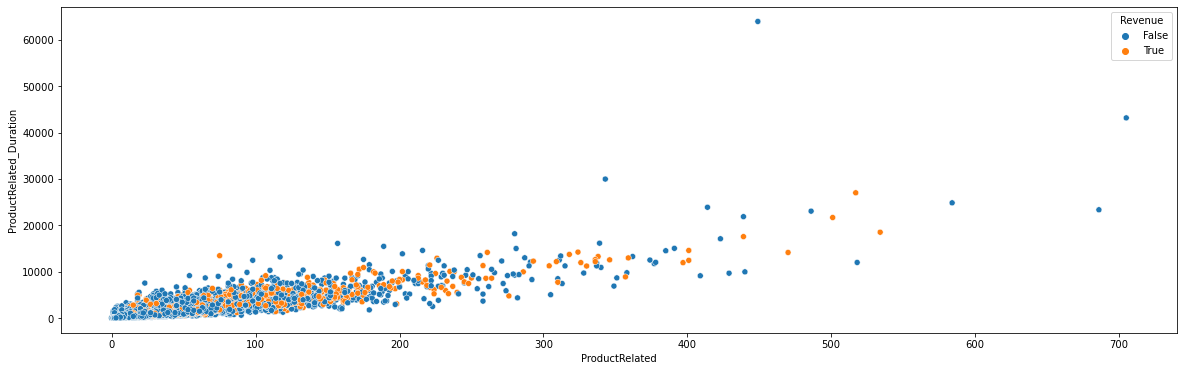

In [47]:
plt.figure(figsize = (20,6))
sns.scatterplot(x= "ProductRelated", y = "ProductRelated_Duration", hue = "Revenue", data = df)

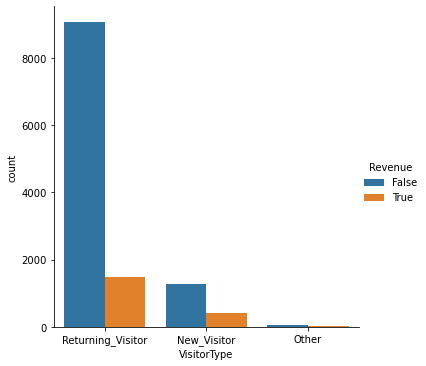

In [48]:
sns.catplot(x ="VisitorType", hue= "Revenue", data = df, kind = "count")

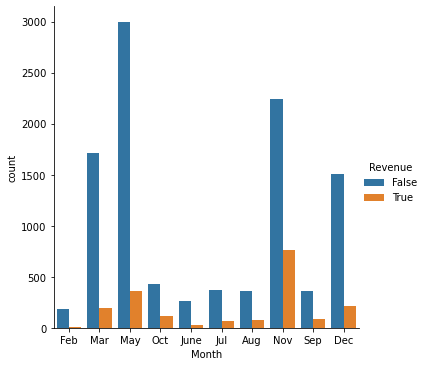

In [49]:
sns.catplot(x = "Month", hue = "Revenue", data = df, kind = "count")

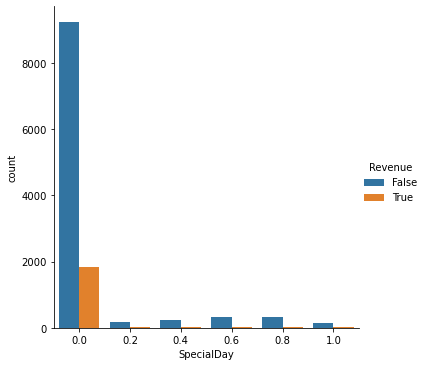

In [50]:
sns.catplot(x = "SpecialDay", hue = "Revenue", data =df, kind = "count")

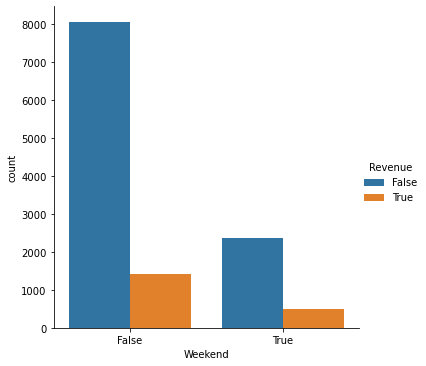

In [51]:
sns.catplot(x = "Weekend", hue = "Revenue", data =df, kind = "count")

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<Figure size 1440x432 with 0 Axes>

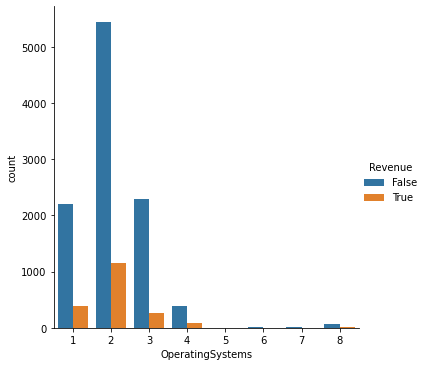

In [53]:
plt.figure(figsize = (20,6))
sns.catplot(x = "OperatingSystems",hue = "Revenue", data = df, kind = "count")

<Figure size 1440x432 with 0 Axes>

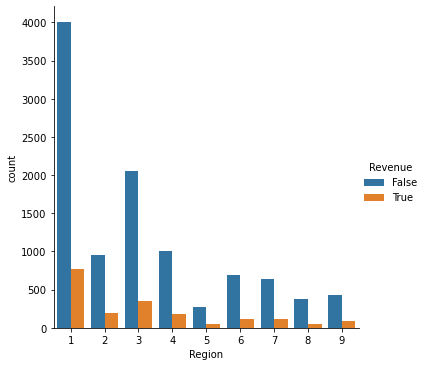

In [54]:
plt.figure(figsize = (20,6))
sns.catplot(x = "Region",hue = "Revenue", data = df, kind = "count")

In [55]:
df_month = df[["Month", "Revenue"]]

df_month_True = df_month[df_month.Revenue == True].groupby("Month").count()
df_month_True.columns = ["RevenueTrue"]

df_month_False = df_month[df_month.Revenue == False].groupby("Month").count()
df_month_False.columns = ["RevenueFalse"]

df_month = pd.concat([df_month_False, df_month_True], 1).sort_values(by= "RevenueTrue", ascending= False)
df_month["TrueRate"] = df_month["RevenueTrue"] / (df_month["RevenueTrue"] + df_month["RevenueFalse"])
df_month.sort_values(by = "TrueRate", ascending= False)

,RevenueFalse,RevenueTrue,TrueRate
Month,,,
Nov,2238,760,0.253502
Oct,434,115,0.209472
Sep,362,86,0.191964
Aug,357,76,0.175520
Jul,366,66,0.152778
Dec,1511,216,0.125072
May,2999,365,0.108502
June,259,29,0.100694
Mar,1715,192,0.100682


In [56]:
#df["Revenue"] = df["Revenue"].apply(lambda x : 1 if x == True else 0)

In [57]:
df_region = df[["Region", "Revenue"]]

df_region_True = df_region[df_region.Revenue == True].groupby("Region").count();df_region_True
df_region_True.columns = ["RevenueTrue"]

df_region_False = df_region[df_region.Revenue == False].groupby("Region").count()
df_region_False.columns = ["RevenueFalse"]

df_region = pd.concat([df_region_False, df_region_True], 1).sort_values(by= "RevenueTrue", ascending= False)
df_region["TrueRate"] = df_region["RevenueTrue"] / (df_region["RevenueTrue"] + df_region["RevenueFalse"])
df_region.sort_values(by = "TrueRate", ascending= False)

,RevenueFalse,RevenueTrue,TrueRate
Region,,,
9,425,86,0.168297
2,948,188,0.165493
5,266,52,0.163522
1,4009,771,0.161297
7,642,119,0.156373
4,1007,175,0.148054
3,2054,349,0.145235
6,693,112,0.139130
8,378,56,0.129032


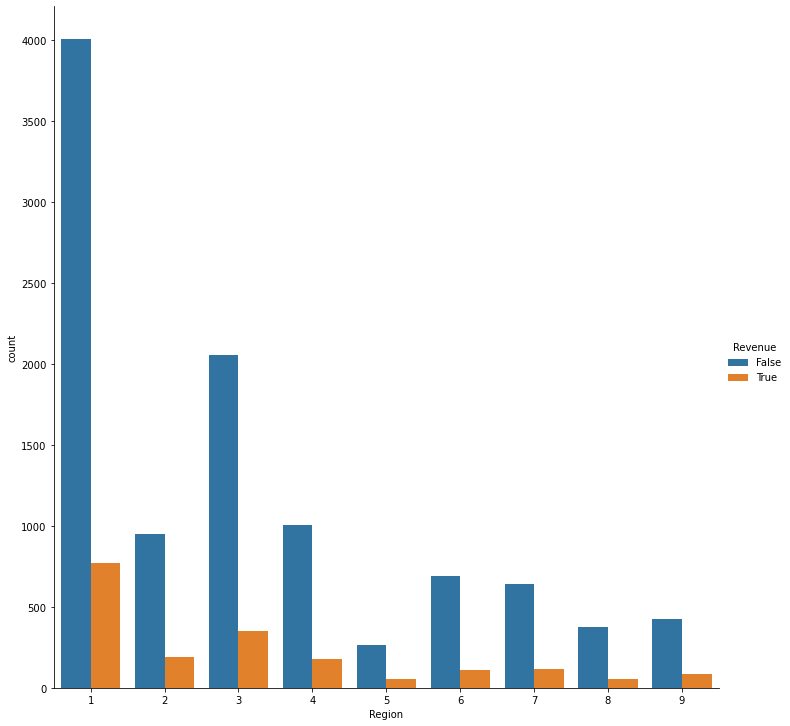

In [58]:
sns.catplot(x = "Region", hue = "Revenue", data = df, kind = "count", height= 10)

<AxesSubplot:xlabel='Region', ylabel='Count'>

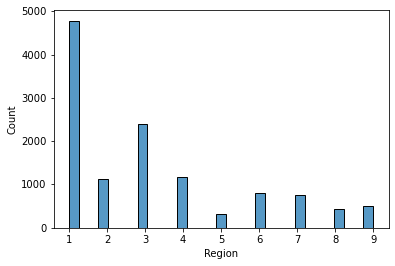

In [59]:
sns.histplot(df.Region)

In [60]:
from sklearn.preprocessing import LabelEncoder, PowerTransformer, MinMaxScaler
enc = LabelEncoder()
df["Month"] = enc.fit_transform(df["Month"])
df["VisitorType"] = enc.fit_transform(df["VisitorType"])
df["Weekend"] = enc.fit_transform(df["Weekend"])

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>],
       [<AxesSubplot:title={'center':'Browser'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>,
        <AxesSubplot:title={'center':'VisitorType'}>],
       [<AxesSubplot:title={'center':'Weekend'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:

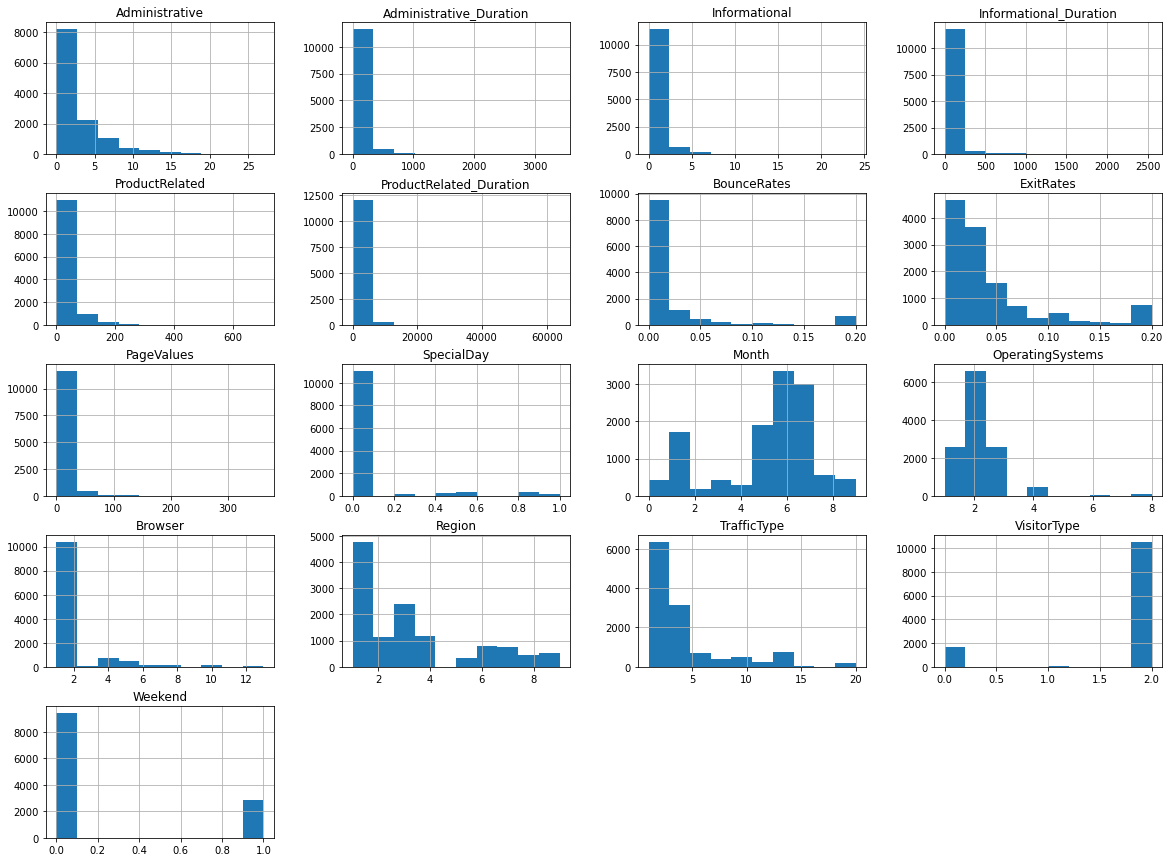

In [61]:
df.iloc[:,:-1].hist(figsize=(20,15))

In [62]:
df.columns[0]

'Administrative'

In [63]:
scaler = MinMaxScaler()
for i in range (0,len(df.columns)):
    
    df[df.columns[i]] = scaler.fit_transform(pd.DataFrame(df[df.columns[i]]))

In [64]:
pwr = PowerTransformer()
for i in range (0,len(df.columns)):
    
    df[df.columns[i]] = pwr.fit_transform(pd.DataFrame(df[df.columns[i]]))

In [65]:
# After scaling, new histogram

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>],
       [<AxesSubplot:title={'center':'Browser'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>,
        <AxesSubplot:title={'center':'VisitorType'}>],
       [<AxesSubplot:title={'center':'Weekend'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:

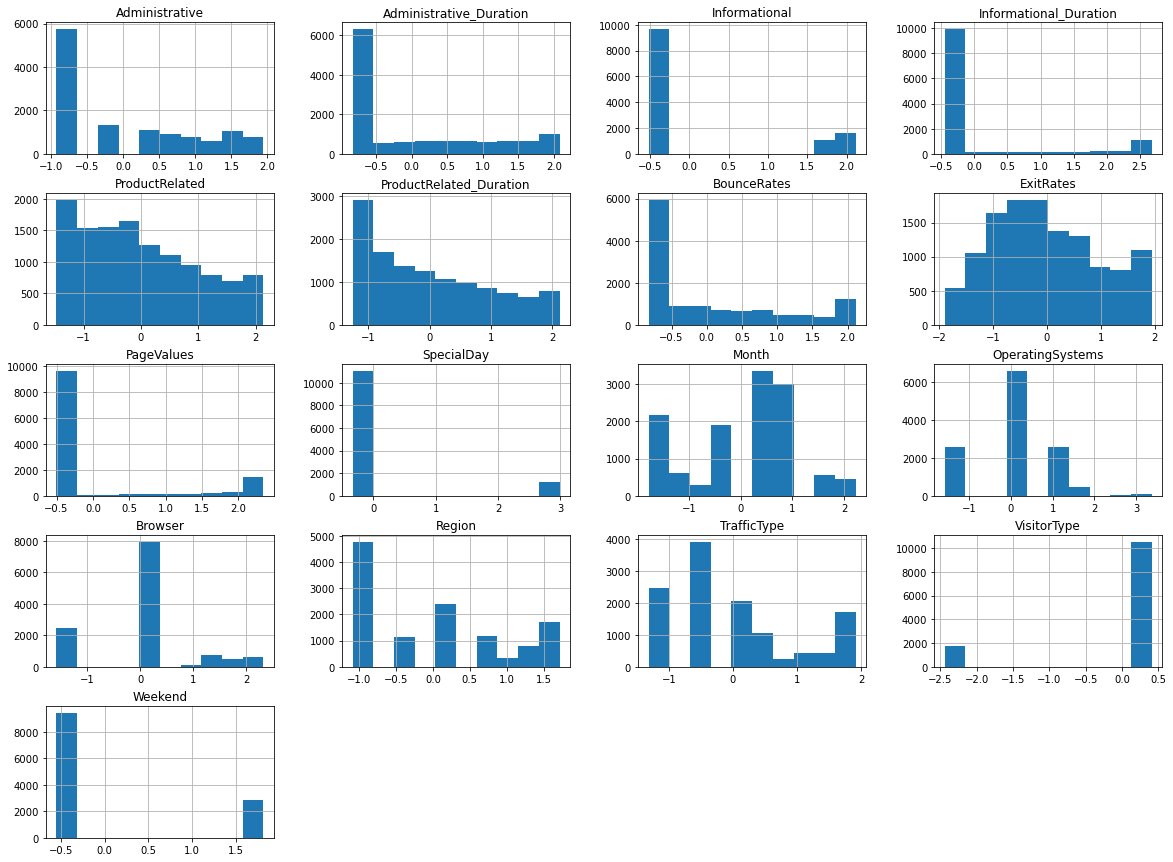

In [66]:
df.iloc[:,:-1].hist(figsize=(20,15))